In [ ]:
import os
from glob import glob
import pandas as pd
import numpy as np
import cv2

import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# nn
from keras.layers import Dense, Activation,Conv2D, MaxPool2D, AveragePooling2D, ZeroPadding2D,BatchNormalization
from keras.layers import GlobalAveragePooling2D, Input, Concatenate, Dropout,Flatten,Dropout
from keras.models import Model,Sequential,load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import backend as K
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, Callback


import warnings
warnings.filterwarnings('ignore')

In [ ]:
labels = ['NORMAL', 'PNEUMONIA']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [ ]:

train_dir = get_training_data('/content/drive/MyDrive/covid_xray/train')


In [ ]:
train_dir.shape

(5216, 2)

In [ ]:

test_dir = get_training_data('/content/drive/MyDrive/covid_xray/test')


In [ ]:
val_dir = get_training_data('/content/drive/MyDrive/covid_xray/val')

In [ ]:

directory = "/content/drive/MyDrive/covid_xray/"
train_dir1 = os.path.join(directory, "train/")
test_dir1 = os.path.join(directory, "test/")
val_dir1 = os.path.join(directory, "val/")

In [ ]:
print(train_dir)

[[array([[143, 127, 134, ...,  36,  22,  13],
       [159, 137, 125, ...,  31,  19,   9],
       [121, 160, 129, ...,  28,  17,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
  0]
 [array([[21, 32, 49, ..., 71, 64, 48],
       [22, 31, 55, ..., 70, 58, 51],
       [19, 34, 54, ..., 70, 56, 49],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)
  0]
 [array([[48, 56, 60, ...,  0,  0,  0],
       [40, 49, 57, ...,  0,  0,  0],
       [40, 50, 55, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)
  0]
 ...
 [array([[58, 60, 64, ..., 69, 70, 70],
       [59, 62, 65, ..., 71, 71, 72],
       [59, 62, 65, ..., 81, 78, 75],
       ...,
       [40, 40, 40, ..., 48, 46, 45],
       [40

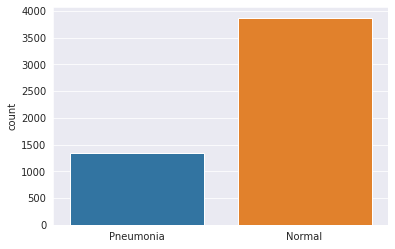

In [ ]:
import seaborn as sns
l = []
for i in train_dir:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

In [ ]:

directory1 = "/content/drive/MyDrive/covid_xray/"
train_dir1 = os.path.join(directory1, "train/")
test_dir1 = os.path.join(directory1, "test/")
val_dir1 = os.path.join(directory1, "val/")

In [ ]:
print("Number of images in Train is {}".format(len(glob(train_dir1 + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir1 + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir1 + "*/*"))))


Number of images in Train is 5216
Number of images in Test is 624
Number of images in Validation is 16


In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train_dir:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test_dir:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val_dir:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
img_size=150
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
# image preprocessing
h                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   )

In [ ]:
train_datagen.fit(x_train)

In [ ]:
# image preprocessing
train_datagen1 = ImageDataGenerator(rotation_range = 40,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True,
                                   rescale = 1./255)
val_datagen1 = ImageDataGenerator(rescale = 1./255)
test_datagen1 = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 16
training_set = train_datagen1.flow_from_directory(train_dir1,
                                                 target_size = (150,150), 
                                                 batch_size = batch_size, 
                                                 class_mode = "binary")
val_set = val_datagen1.flow_from_directory(val_dir1,
                                          target_size = (150,150),
                                          batch_size = batch_size,
                                          class_mode = 'binary')
test_set = test_datagen1.flow_from_directory(test_dir1,
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
img,label=next(training_set)

In [ ]:
timg,tlabel=next(test_set)

In [ ]:
tlabel.shape

(16,)

In [ ]:
training_set.directory

'/content/drive/MyDrive/covid_xray/train/'

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **Traditional CNN**

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(150,150,1)))


In [ ]:
from keras.layers import BatchNormalization
model.add(BatchNormalization())

In [ ]:
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
#Adding second convolution layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2,strides=2))

#third
#Adding second convolution layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2,strides=2))

#fourth
#Adding second convolution layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2,strides=2))

#Adding second convolution layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

In [ ]:
#now the full connected layer
model.add(Dense(units=128,activation='relu'))
#input layer

In [ ]:
model.add(Dense(units=1,activation='sigmoid',kernel_regularizer=l2(0.01)))#output layer

In [ ]:
#training and compiling
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc','AUC']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 72, 72, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='acc', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


In [ ]:
his= model.fit(train_datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = train_datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])


Epoch 1/12
163/163 [==============================] - 23s 89ms/step - loss: 0.3552 - acc: 0.8509 - auc: 0.9022 - val_loss: 3.4751 - val_acc: 0.5000 - val_auc: 0.5000
Epoch 2/12
163/163 [==============================] - 14s 85ms/step - loss: 0.2767 - acc: 0.8948 - auc: 0.9444 - val_loss: 7.2481 - val_acc: 0.5000 - val_auc: 0.5000
Epoch 3/12
163/163 [==============================] - 14s 85ms/step - loss: 0.2412 - acc: 0.9120 - auc: 0.9557 - val_loss: 4.6540 - val_acc: 0.5000 - val_auc: 0.5000
Epoch 4/12
163/163 [==============================] - 14s 86ms/step - loss: 0.2193 - acc: 0.9136 - auc: 0.9632 - val_loss: 8.2595 - val_acc: 0.5000 - val_auc: 0.5000
Epoch 5/12
163/163 [==============================] - 14s 86ms/step - loss: 0.2023 - acc: 0.9239 - auc: 0.9675 - val_loss: 0.7581 - val_acc: 0.5000 - val_auc: 0.7031
Epoch 6/12
163/163 [==============================] - 14s 86ms/step - loss: 0.1877 - acc: 0.9283 - auc: 0.9704 - val_loss: 7.4133 - val_acc: 0.5000 - val_auc: 0.5000
Epoc

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")


20/20 [==============================] - 1s 18ms/step - loss: 0.5129 - acc: 0.7372 - auc: 0.9424
Loss of the model is -  0.512904167175293
20/20 [==============================] - 0s 17ms/step - loss: 0.5129 - acc: 0.7372 - auc: 0.9424
Accuracy of the model is -  73.71794581413269 %


In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
predictions[:]


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,


> # **Classification report**






In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))


                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.59      0.97      0.73       234
   Normal (Class 1)       0.97      0.60      0.74       390

           accuracy                           0.74       624
          macro avg       0.78      0.78      0.74       624
       weighted avg       0.83      0.74      0.74       624





# > **Confusion matrix**


In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[227,   7],
       [157, 233]])



> # **Sensitivity vs Specificity of traditional CNN**



In [ ]:
sensitivity=cm[0][0]/(cm[0][0]+cm[1][0])
print(sensitivity)
print(sensitivity*100)

0.5911458333333334
59.114583333333336


In [ ]:
specificity=cm[1][1]/(cm[1][1]+cm[0][1])
print(specificity)
print(specificity*100)

0.9708333333333333
97.08333333333333


In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]


In [ ]:
correct.shape

(460,)

In [ ]:
incorrect.shape

(164,)

In [ ]:
correct

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 18



# > **AUC**



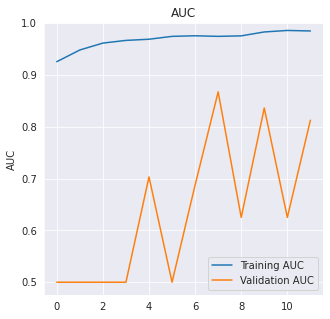

In [ ]:

auc = his.history['auc']
val_auc = his.history['val_auc']

plt.figure(figsize=(5, 5))
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('AUC')

plt.show();

# **Predictions**

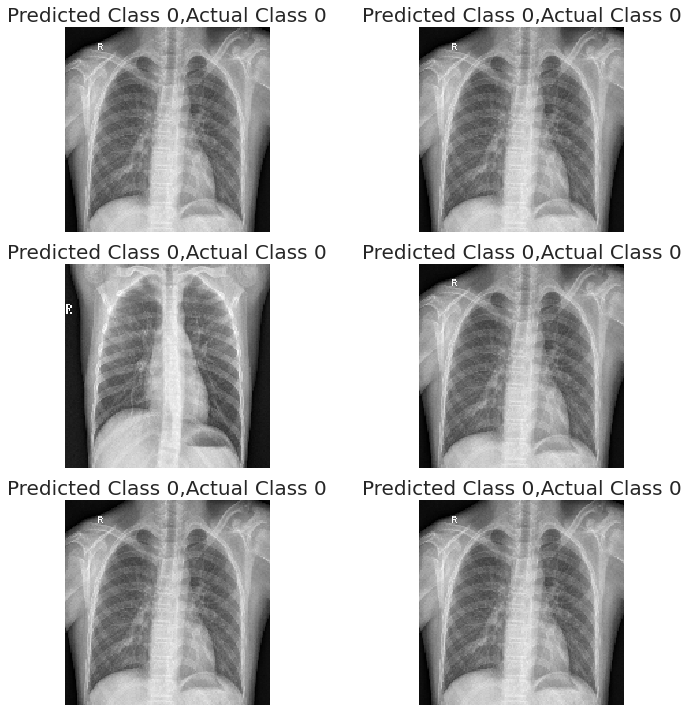

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for x in predictions[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(x_test[x].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[x], y_test[x]),fontdict = {'fontsize' : 20})
    i += 1

    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

In [ ]:
train_classes=os.listdir(train_dir1)


In [ ]:
x1=[]
y1=[]
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input
for folder in os.listdir(train_dir1):
    image_list=os.listdir(train_dir1+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(train_dir1+"/"+folder+"/"+img_name,target_size=(150,150))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of VGG16 model to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        x1.append(img) # appending image array
        y1.append(train_classes.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [ ]:
os.listdir(train_dir1)

['NORMAL', 'PNEUMONIA']

In [ ]:
from keras.utils import to_categorical

x1=np.array(x1)
y1=to_categorical(y1) # onehot encoding of the labels
y1.shape

(5216, 2)

In [ ]:
cpt_filename = 'checkpoint_best.hdf5'
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath=cpt_filename, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


#**DenseNet121**


In [ ]:

from keras.applications import DenseNet121

def build_model(backbone, lr=1e-4):
    dmodel=Sequential()
    dmodel.add(backbone)
    dmodel.add(GlobalAveragePooling2D())
    dmodel.add(BatchNormalization())
    dmodel.add(Dropout(0.5))
    dmodel.add(Dense(1024,activation='relu'))
    dmodel.add(Dense(128,activation='relu'))
    dmodel.add(BatchNormalization())

    dmodel.add(Dropout(0.5))

    dmodel.add(Dense(2, activation='sigmoid'))
    
    dmodel.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['acc','AUC']
    )
    return dmodel

densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

dmodel = build_model(densenet ,lr = 1e-4)
dmodel.summary()

29089792/29084464 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_______________________________________________________

# **train test splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x1,y1,test_size=0.2,random_state=5)


In [ ]:
ytest.shape

(1044, 2)

In [ ]:


history=dmodel.fit(xtrain,ytrain,epochs=12,verbose=True,
          validation_data=(xtest,ytest),callbacks=[learning_rate_reduction])


Epoch 1/12
131/131 [==============================] - 76s 462ms/step - loss: 0.5632 - acc: 0.7848 - auc: 0.8166 - val_loss: 0.6462 - val_acc: 0.8113 - val_auc: 0.8397
Epoch 2/12
131/131 [==============================] - 55s 418ms/step - loss: 0.1704 - acc: 0.9675 - auc: 0.9828 - val_loss: 0.0693 - val_acc: 0.9866 - val_auc: 0.9969
Epoch 3/12
131/131 [==============================] - 54s 416ms/step - loss: 0.0926 - acc: 0.9782 - auc: 0.9950 - val_loss: 0.0387 - val_acc: 0.9885 - val_auc: 0.9995
Epoch 4/12
131/131 [==============================] - 54s 415ms/step - loss: 0.0590 - acc: 0.9896 - auc: 0.9973 - val_loss: 0.0908 - val_acc: 0.9674 - val_auc: 0.9941
Epoch 5/12
131/131 [==============================] - 54s 416ms/step - loss: 0.0559 - acc: 0.9866 - auc: 0.9978 - val_loss: 0.0369 - val_acc: 0.9895 - val_auc: 0.9992
Epoch 6/12
131/131 [==============================] - 54s 416ms/step - loss: 0.0398 - acc: 0.9943 - auc: 0.9984 - val_loss: 0.0443 - val_acc: 0.9875 - val_auc: 0.997

# **Evaluation**

In [ ]:
print("Loss of the model is - " , dmodel.evaluate(xtest,ytest)[0])
print("Accuracy of the model is - " , dmodel.evaluate(xtest,ytest)[1]*100 , "%")


33/33 [==============================] - 4s 119ms/step - loss: 0.0218 - acc: 0.9933 - auc: 0.9998
Loss of the model is -  0.021787695586681366
33/33 [==============================] - 4s 118ms/step - loss: 0.0218 - acc: 0.9933 - auc: 0.9998
Accuracy of the model is -  99.32950139045715 %


In [ ]:
predictionsd = dmodel.predict_classes(xtest)
predictionsd[:15]


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
xtest.shape

(1044, 150, 150, 3)

In [ ]:
ytest

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
dtruey=[]
for i in range(0,len(predictionsd)):
    dtruey.append(int(ytest[i][1]))


In [ ]:
print(dtruey[:15])

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [ ]:
dcorrtest=[]
dincorrtest=[]
for i in range(0,len(predictionsd)):
  if(predictionsd[i]==dtruey[i]):
    dcorrtest.append(i)
  else:
    dincorrtest.append(i)

In [ ]:
len(dcorrtest)

1037

In [ ]:
len(dincorrtest)

7

In [ ]:
#index where prediction was wrong
print(dincorrtest)

[18, 136, 386, 439, 741, 900, 971]


# **Predictions**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

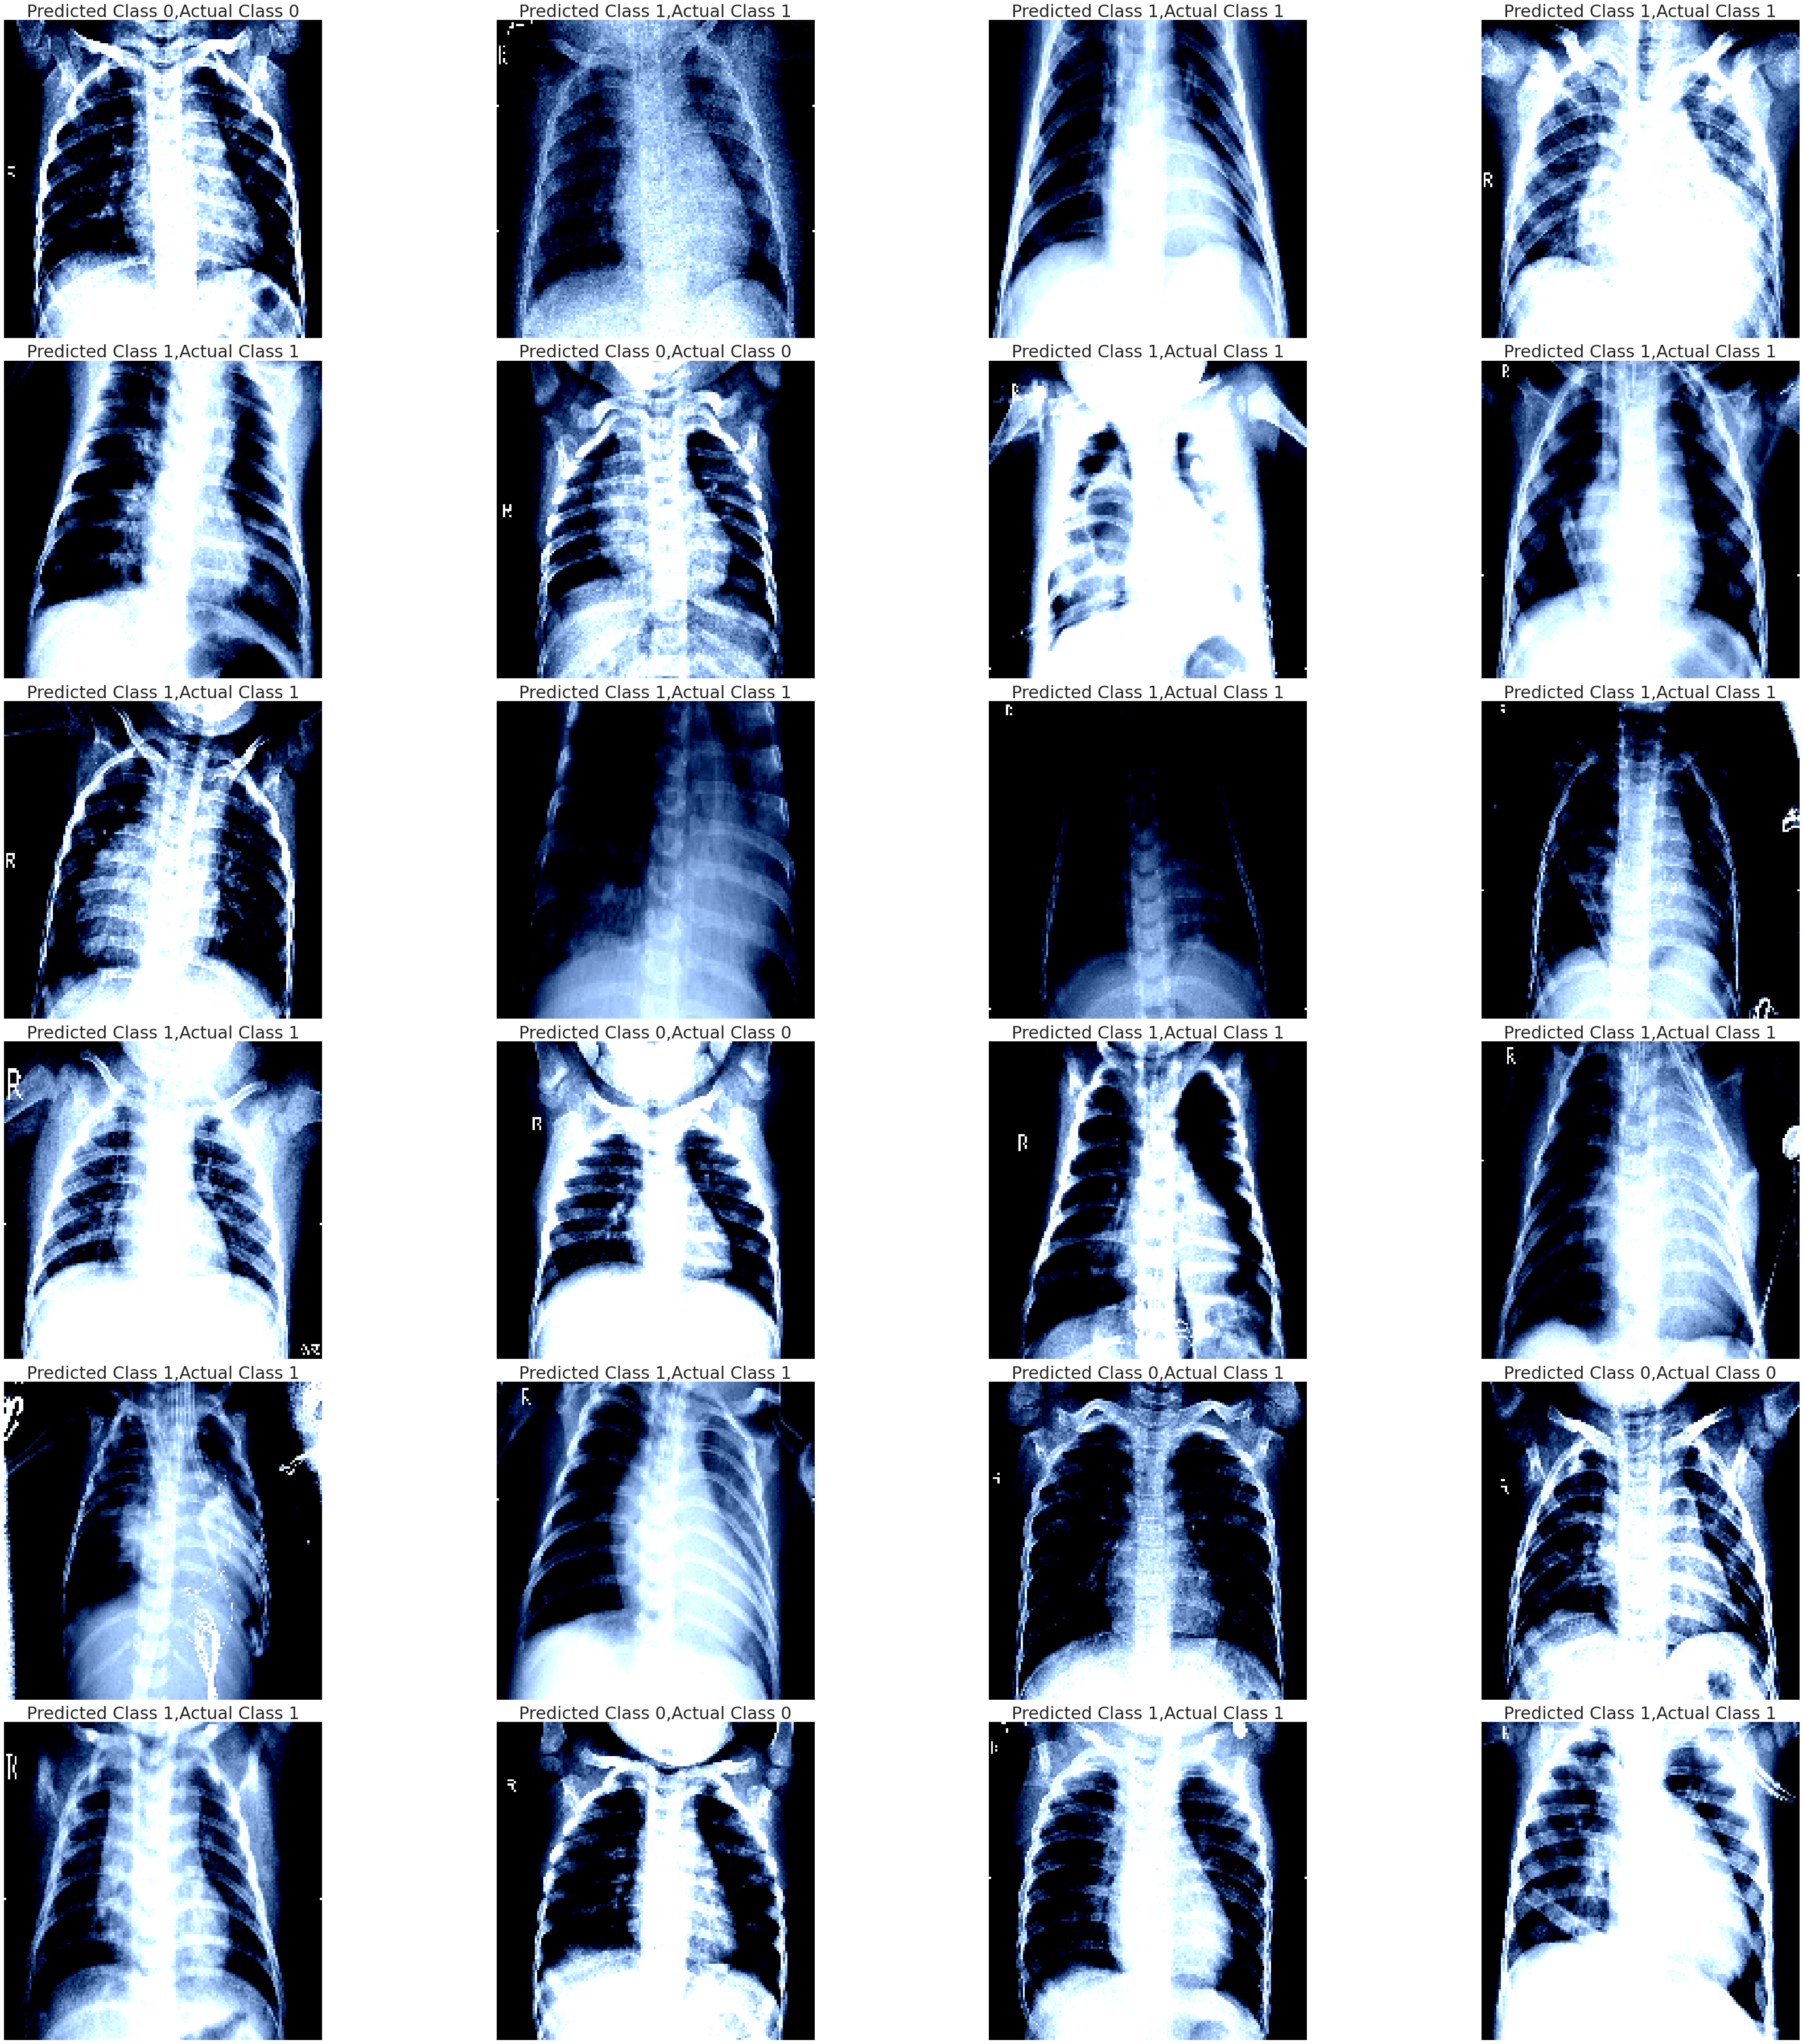

In [ ]:
i = 0
plt.figure(figsize=(50,50))

for x in range(0,24):
    plt.subplot(3,8,i+1)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(xtest[x],  interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictionsd[x], dtruey[x]),fontdict = {'fontsize' : 30})
    i += 1

    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

# **Classification report**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(dtruey, predictionsd, target_names = ['Normal(Class 0)','Pneumonia (Class 1)']))


                     precision    recall  f1-score   support

    Normal(Class 0)       0.98      0.99      0.99       262
Pneumonia (Class 1)       1.00      0.99      1.00       782

           accuracy                           0.99      1044
          macro avg       0.99      0.99      0.99      1044
       weighted avg       0.99      0.99      0.99      1044



# **Confusion Matrix**

In [ ]:
cm1 = confusion_matrix(dtruey,predictionsd)
cm1

array([[260,   2],
       [  5, 777]])

# **Sensitivity and Specificity**

In [ ]:
sensitivity1=cm1[0][0]/(cm1[0][0]+cm1[1][0])
print(sensitivity1)
print(sensitivity1*100)

0.9811320754716981
98.11320754716981


In [ ]:
specificity1=cm1[1][1]/(cm1[1][1]+cm1[0][1])
print(specificity1)
print(specificity1*100)

0.9974326059050064
99.74326059050064


# **AUC**

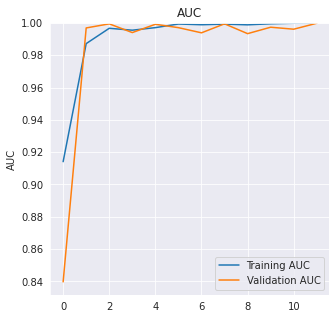

In [ ]:

auc1 = history.history['auc']
val_auc1 = history.history['val_auc']

plt.figure(figsize=(5, 5))
plt.plot(auc1, label='Training AUC')
plt.plot(val_auc1, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('AUC')

plt.show();

In [ ]:
test_classes=os.listdir(test_dir1)

# Declaring variables
test_images=[]
test_images_Original=[]
test_image_label=[] # to store the labels of the images

for folder in os.listdir(test_dir1):
    image_list=os.listdir(test_dir1+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_dir1+"/"+folder+"/"+img_name,target_size=(150,150))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_Original.append(img.copy())
        
        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        test_images.append(img) # appending image array
        test_image_label.append(test_classes.index(folder))
        
print("Preparing Test Dataset Completed.")

Preparing Test Dataset Completed.


In [ ]:
dtrue=np.argmax(val_image_label[4])
dtrue

In [ ]:
dpredict=[]
d_true=[]
for i in range(0,16):
  dpredict.append(np.argmax(val_predictions[i]))
  d_true.append(np.argmax(val_image_label[i]))


In [ ]:
dcorr=[]
dincorr=[]
for i in range(0,16):
  if(dpredict[i]==d_true[i]):
    dcorr.append(i)
  else:
    dincorr.append(i)

In [ ]:
dcorr

In [ ]:
len(dincorr)

In [ ]:
val_classes=os.listdir(val_dir1)


In [ ]:
# Declaring variables
val_images=[]
val_images_Original=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(val_dir1):
    image_list=os.listdir(val_dir1+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_dir1+"/"+folder+"/"+img_name,target_size=(150,150))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_Original.append(img.copy())
        
        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(val_classes.index(folder))
        
print("Preparing Validation Dataset Completed.")

In [ ]:
from keras.utils import to_categorical

xv=np.array(xv)
yv=to_categorical(yv) # onehot encoding of the labels
yv.shape

NameError: ignored

# **VGG16**

In [ ]:
from keras.applications import VGG16
vgg16 = VGG16(input_shape=(150,150, 3),include_top=False, weights='imagenet')
vgg16.trainable = False
from keras.optimizers import RMSprop


vgg16model = Sequential([
        vgg16,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(2,activation='softmax')
        ])

vgg16model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy','AUC'])
vgg16model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_______________________________________________________

In [ ]:

from sklearn.model_selection import train_test_split
xtrain_v, xtest_v, ytrain_v, ytest_v = train_test_split(x1,y1,test_size=0.2,random_state=5)



In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_cb1 = EarlyStopping(monitor ='val_loss', patience=20, mode = 'min',restore_best_weights=True)

In [ ]:
learning_rate_reduction1 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


history1=vgg16model.fit(xtrain_v,ytrain_v,epochs=12,verbose=True,
          validation_data=(xtest_v,ytest_v),callbacks=[learning_rate_reduction1,early_stopping_cb1])


Epoch 1/12
131/131 [==============================] - 29s 201ms/step - loss: 0.7098 - accuracy: 0.8627 - auc: 0.9119 - val_loss: 0.0595 - val_accuracy: 0.9770 - val_auc: 0.9948
Epoch 2/12
131/131 [==============================] - 23s 178ms/step - loss: 0.1159 - accuracy: 0.9600 - auc: 0.9848 - val_loss: 0.0648 - val_accuracy: 0.9808 - val_auc: 0.9947
Epoch 3/12
131/131 [==============================] - 23s 179ms/step - loss: 0.0799 - accuracy: 0.9691 - auc: 0.9922 - val_loss: 0.0449 - val_accuracy: 0.9818 - val_auc: 0.9972
Epoch 4/12
131/131 [==============================] - 23s 177ms/step - loss: 0.0649 - accuracy: 0.9739 - auc: 0.9927 - val_loss: 0.0398 - val_accuracy: 0.9875 - val_auc: 0.9966
Epoch 5/12
131/131 [==============================] - 23s 179ms/step - loss: 0.0573 - accuracy: 0.9818 - auc: 0.9933 - val_loss: 0.2570 - val_accuracy: 0.9406 - val_auc: 0.9683
Epoch 6/12
131/131 [==============================] - 23s 177ms/step - loss: 0.0585 - accuracy: 0.9796 - auc: 0.994

# **Evaluation**

In [ ]:
print("Loss of the model is - " , vgg16model.evaluate(xtest_v,ytest_v)[0])
print("Accuracy of the model is - " , vgg16model.evaluate(xtest_v,ytest_v)[1]*100 , "%")


33/33 [==============================] - 5s 142ms/step - loss: 0.1150 - accuracy: 0.9856 - auc: 0.9903
Loss of the model is -  0.11501087248325348
33/33 [==============================] - 5s 140ms/step - loss: 0.1150 - accuracy: 0.9856 - auc: 0.9903
Accuracy of the model is -  98.56321811676025 %


In [ ]:
predictionsv = vgg16model.predict_classes(xtest_v)
predictionsv[:15]


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

# **Classification report**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(vtruey, predictionsv, target_names = ['Normal(Class 0)','Pneumonia (Class 1)']))


                     precision    recall  f1-score   support

    Normal(Class 0)       0.96      0.98      0.97       262
Pneumonia (Class 1)       0.99      0.99      0.99       782

           accuracy                           0.99      1044
          macro avg       0.98      0.98      0.98      1044
       weighted avg       0.99      0.99      0.99      1044



# **Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

cm2 = confusion_matrix(vtruey,predictionsv)
cm2

array([[257,   5],
       [ 10, 772]])

# **AUC**

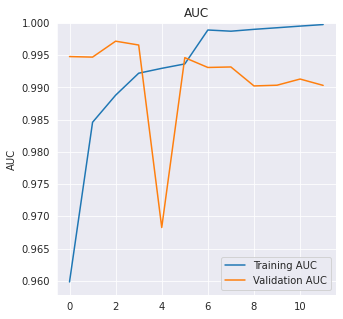

In [ ]:

auc2 = history1.history['auc']
val_auc2 = history1.history['val_auc']

plt.figure(figsize=(5, 5))
plt.plot(auc2, label='Training AUC')
plt.plot(val_auc2, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('AUC')

plt.show();

# **Sensitivity and Specificity**

In [ ]:
sensitivity2=cm2[0][0]/(cm2[0][0]+cm2[1][0])
print(sensitivity2)
print(sensitivity2*100)

0.9625468164794008
96.25468164794007


In [ ]:
specificity2=cm2[1][1]/(cm2[1][1]+cm2[0][1])
print(specificity2)
print(specificity2*100)

0.9935649935649936
99.35649935649936


In [ ]:
vtruey=[]
for i in range(0,len(predictionsv)):
    vtruey.append(int(ytest_v[i][1]))


In [ ]:
vcorr=[]
vincorr=[]
for i in range(0,len(predictionsv)):
  if(predictionsv[i]==vtruey[i]):
    vcorr.append(i)
  else:
    vincorr.append(i)

In [ ]:
len(vcorr)

1029

In [ ]:
len(vincorr)

15

In [ ]:
vincorr
#indices where prediction is wrong


[18, 136, 210, 265, 298, 373, 386, 439, 499, 592, 716, 871, 920, 962, 971]

# **Predictions**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

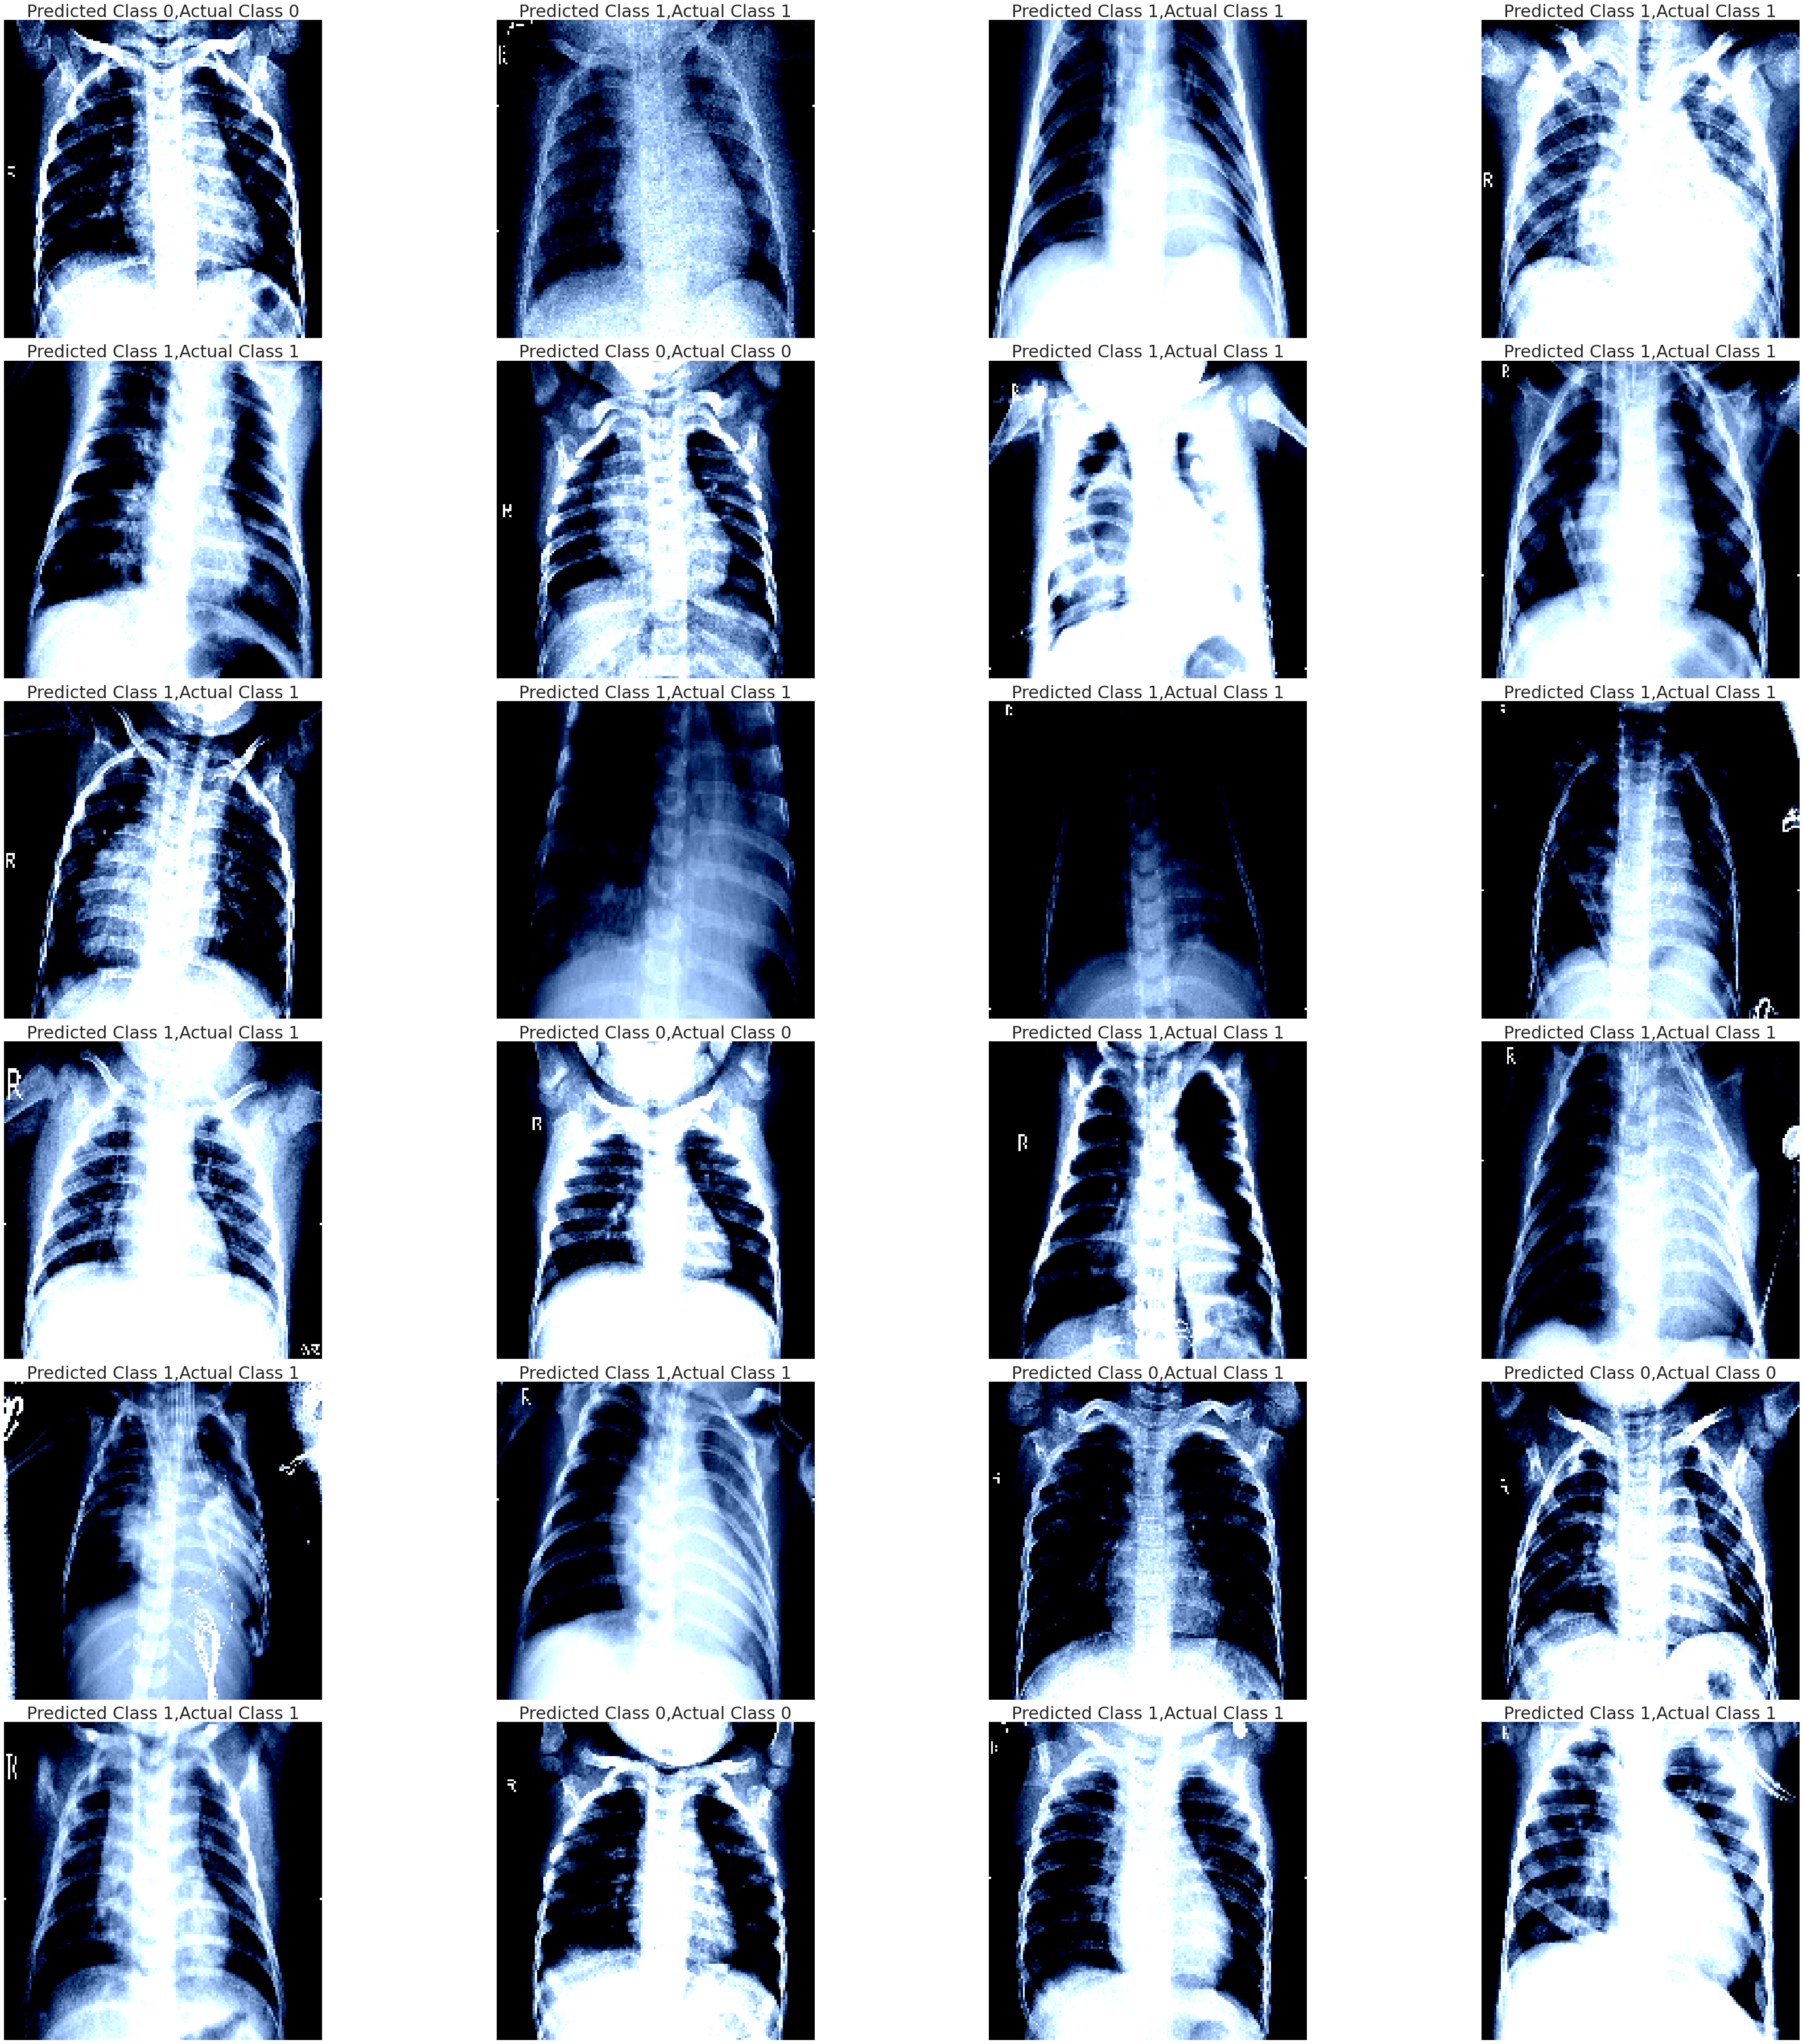

In [ ]:
i = 0
plt.figure(figsize=(50,50))

for x in range(0,24):
    plt.subplot(6,4,i+1)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(xtest_v[x],cmap='gray',  interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictionsv[x], vtruey[x]),fontdict = {'fontsize' : 30})
    i += 1

    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

In [ ]:
from keras.applications.resnet50 import ResNet50


In [ ]:

def build_model(backbone, lr=1e-4):
    rmodel = Sequential()
    rmodel.add(backbone)
    rmodel.add(GlobalAveragePooling2D())
    rmodel.add(Dense(1000, activation="relu"))
    rmodel.add(Dropout(0.5))
    rmodel.add(Dense(1,activation="sigmoid"))
    
    rmodel.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['acc']
    )
    return rmodel

resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

resmodel = build_model(resnet ,lr = 1e-4)
resmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              2049000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1001      
Total params: 25,637,713
Trainable params: 25,584,593
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:

from sklearn.model_selection import train_test_split
xtrain_r, xtest_r, ytrain_r, ytest_r = train_test_split(x1,y1,test_size=0.2,random_state=5)



In [ ]:


history2=resmodel50.fit(xtrain_r,ytrain_r,epochs=12,verbose=True,
          validation_data=(xtest_r,ytest_r),callbacks=[learning_rate_reduction1,early_stopping_cb1])


Epoch 1/12
131/131 [==============================] - 17s 103ms/step - loss: 0.6293 - accuracy: 0.8174 - val_loss: 0.1661 - val_accuracy: 0.9234
Epoch 2/12
131/131 [==============================] - 12s 92ms/step - loss: 0.1728 - accuracy: 0.9365 - val_loss: 0.1029 - val_accuracy: 0.9722
Epoch 3/12
131/131 [==============================] - 12s 93ms/step - loss: 0.1257 - accuracy: 0.9506 - val_loss: 0.4085 - val_accuracy: 0.8927
Epoch 4/12
131/131 [==============================] - 12s 93ms/step - loss: 0.1171 - accuracy: 0.9588 - val_loss: 0.3324 - val_accuracy: 0.8630

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/12
131/131 [==============================] - 12s 93ms/step - loss: 0.0709 - accuracy: 0.9748 - val_loss: 0.0814 - val_accuracy: 0.9761
Epoch 6/12
131/131 [==============================] - 12s 93ms/step - loss: 0.0559 - accuracy: 0.9790 - val_loss: 0.1155 - val_accuracy: 0.9674
Epoch 7/12
131/131 [==============================] - 

In [ ]:
print("Loss of the model is - " , resmodel50.evaluate(xtest_r,ytest_r)[0])
print("Accuracy of the model is - " , resmodel50.evaluate(xtest_r,ytest_r)[1]*100 , "%")


33/33 [==============================] - 2s 67ms/step - loss: 0.0889 - accuracy: 0.9780
Loss of the model is -  0.08890219777822495
33/33 [==============================] - 2s 67ms/step - loss: 0.0889 - accuracy: 0.9780
Accuracy of the model is -  97.79693484306335 %


In [ ]:
predictionsr = resmodel50.predict_classes(xtest_r)
predictionsr[:15]


AttributeError: ignored

In [ ]:

imageset = glob(test_dir + "*/*")
random_images = [np.random.choice(imageset) for i in range(9)]

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = cv2.imread(random_images[i])
    orig = img.copy()
    img = cv2.resize(img, (224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    predictiond = resmodel50.predict(img)
    
    if (predictiond < 0.5):
        plt.title("Normal", fontdict = {'fontsize' : 20})
    
    else:
        plt.title("Covid-19", fontdict = {'fontsize' : 20})
    plt.imshow(orig, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

In [ ]:

from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [ ]:
# Loading MobileNet without top layer
mobnetv2 = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = mobnetv2.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)
x = Dense(1280, activation='relu')(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)
mobnet = Dense(1, activation='sigmoid')(x)

mobmodel = Model(inputs=mobnetv2.input, outputs=mobnet)

# Freezing MobileNet layers
for layer in mobnetv2.layers:
    layer.trainable=False
    
optimizer = Adam(lr=0.0004)

mobmodel.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

history3 = mobmodel.fit(
        training_set,
        epochs=15,
        validation_data=val_set,
        verbose = 1)

In [ ]:
 
imageset = glob(test_dir + "*/*")
random_images = [np.random.choice(imageset) for i in range(9)]

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = cv2.imread(random_images[i])
    orig = img.copy()
    img = cv2.resize(img, (224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    predictionm = mobmodel.predict(img)
    
    if (predictionm < 0.5):
        plt.title("Normal", fontdict = {'fontsize' : 20})
    
    else:
        plt.title("Covid-19", fontdict = {'fontsize' : 20})
    plt.imshow(orig, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  